<a href="https://colab.research.google.com/github/CO-CO-LAB/Data-Analysis-Portfolio/blob/main/Data_Extraction_(webscraping).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data extraction and processing
Extracting data from a website using webscraping and reqeust APIs process it using Pandas and Numpy libraries.

I want to extract the list of the top 10 largest economies of the world in descending order of their GDPs in Billion USD (rounded to 2 decimal places).

URL: https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29


In [ ]:
# required packages
!pip install pandas numpy
!pip install lxml
!pip install bs4
!pip install requests pandas html5lib

In [ ]:
import numpy as np
import pandas as pd

# suppress warnings generated:
def warn(*args, **kwargs):
    pass
import warnings

warnings.warn = warn
warnings.filterwarnings('ignore')

Extracting data from the following URL using Web Scraping.



In [ ]:
URL="https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29"

Using Pandas library to extract the required table directly as a DataFrame. The required table is the third one on the website, as shown in the image below.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/images/pandas_wbs_3.png">

In [ ]:
# Extracting tables from webpage
tables=pd.read_html(URL)
df=tables[3]

# Replacing the column headers with column numbers
df.columns = range(df.shape[1])

# Retaining columns with index 0 and 2 (country and value of GDP quoted by IMF)
df=df[[0,2]]

# Retaining the Rows with index 1 to 10
df= df.iloc[1:11,: ]

# Assigning column names as "Country" and "GDP (Million USD)"
df.columns=["Country" , "GDP (Million USD)"]

Modifying the GDP column of the DataFrame, converting the value available in Million USD to Billion USD. Use the round() method of Numpy library to round the value to 2 decimal places. Modify the header of the DataFrame to GDP (Billion USD).

In [ ]:
# Changing the data type of the 'GDP (Million USD)' column to int by astype()
df['GDP (Million USD)']= df['GDP (Million USD)'].astype(int)

# Converting the GDP value in Million USD to Billion USD
df['GDP (Million USD)']= df['GDP (Million USD)']/1000

# Using round() to round the value to 2 decimal places
df['GDP (Million USD)']= np.round(df['GDP (Million USD)'],2)

# Renaming the column header from 'GDP (Million USD)' to 'GDP (Billion USD)'
df.columns = ['Country', 'GDP (Billion USD)']
df

,Country,GDP (Billion USD)
1,United States,26854.60
2,China,19373.59
3,Japan,4409.74
4,Germany,4308.85
5,India,3736.88
6,United Kingdom,3158.94
7,France,2923.49
8,Italy,2169.74
9,Canada,2089.67
10,Brazil,2081.24


Loading the DataFrame to the CSV file named

"Largest_economies.csv"

In [ ]:
df.to_csv('Largest_economies.csv', index=False)

from google.colab import files
files.download('Largest_economies.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Webscraping and HTML basis



In [ ]:
import requests
from bs4 import BeautifulSoup
# The URL of the webpage we want to scrape
url = 'https://en.wikipedia.org/wiki/IBM'
# Sending an HTTP GET request to the webpage
response = requests.get(url)
# Storing the HTML content
html_content = response.text
# Creating a BeautifulSoup object to parse the HTML
soup = BeautifulSoup(html_content, 'html.parser')
# Displaying a snippet of the HTML content
print(html_content[:500])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-


In [ ]:
# Find all <a> tags (anchor tags) in the HTML
links = soup.find_all('a')
# Iterate through the list of links and print their text
for link in links[:10]:
    print(link.text)

Jump to content
Main page
Contents
Current events
Random article
About Wikipedia
Contact us
Help
Learn to edit
Community portal


# Access REST APIs & Request HTTP

In [ ]:
import os
from PIL import Image
from IPython.display import IFrame
from IPython.display import display, Image as IPImage

In [ ]:
url='https://www.imdb.com/title/tt0697735/'
r=requests.get(url)

In [ ]:
r.status_code

403

In [ ]:
print(r.request.headers)

{'User-Agent': 'python-requests/2.32.3', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


In [ ]:
header=r.headers
print(r.headers)

{'Content-Type': 'text/html', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Server': 'Server', 'Date': 'Sat, 04 Jan 2025 03:28:54 GMT', 'Strict-Transport-Security': 'max-age=47474747; includeSubDomains; preload', 'Vary': 'Content-Type,Accept-Encoding,User-Agent', 'x-amz-rid': '3EKK5R98VHMYA272EYTT', 'X-Cache': 'Error from cloudfront', 'Via': '1.1 ac3f5ff5f29f102b8bc81b41df4c002e.cloudfront.net (CloudFront)', 'X-Amz-Cf-Pop': 'LAX50-C3', 'Alt-Svc': 'h3=":443"; ma=86400', 'X-Amz-Cf-Id': 'owzJZHHkoIy7g7z1WjraDzHWMZUb-vnSxUT44QaVXKl2PFP1jT7PqA=='}


In [ ]:
print(r.request.body)

None


In [ ]:
header['date']

'Sat, 04 Jan 2025 03:28:54 GMT'

In [ ]:
header['Content-Type']

'text/html'

In [ ]:
 r.encoding

'ISO-8859-1'

In [ ]:
r.text[0:100]

'<html>\r\n<head><title>403 Forbidden</title></head>\r\n<body>\r\n<center><h1>403 Forbidden</h1></center>\r\n'

In [ ]:
url = 'https://upload.wikimedia.org/wikipedia/commons/4/44/Our_World_in_Data_logo.png'

# Make a GET request
r = requests.get(url)

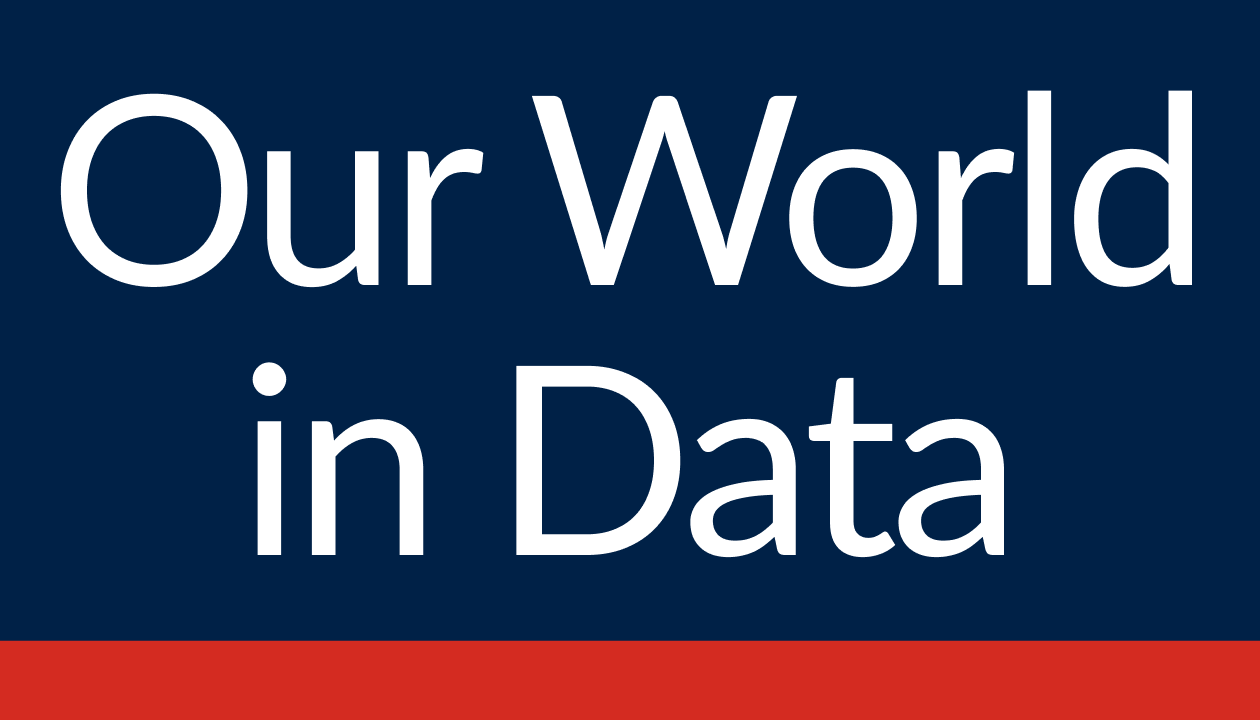

In [ ]:
# Check the response
if r.status_code == 200 and 'image' in r.headers.get('Content-Type', ''):
    # Save the image
    path = os.path.join(os.getcwd(), 'image.png')
    with open(path, 'wb') as f:
        f.write(r.content)

    # Display the image in Colab
    display(IPImage(path))
else:
    print("Failed to retrieve a valid image.")

-------------------------------------------------------------
# Random User API


In [ ]:
!pip install randomuser

  Preparing metadata (setup.py) ... done
  Created wheel for randomuser: filename=randomuser-1.6-py3-none-any.whl size=5068 sha256=e171f69e4050044e42052b11cf75cd2974662ecf4568c1b436931a6d750570bb
  Stored in directory: /root/.cache/pip/wheels/b8/f3/19/6a938647065b4bb2471a9d063647d14d4fcc3236731f4e2b53
Successfully built randomuser


In [ ]:
from randomuser import RandomUser
from IPython.display import Image, display

In [ ]:
r = RandomUser()

In [ ]:
some_list= r.generate_users(5)
some_list

In [ ]:
name = r.get_full_name()
print(name)
some_list[1].get_full_name()

Logan Gill


'Enni Latt'

In [ ]:
for user in some_list:
  print(user.get_full_name(), " " ,user.get_gender(), " " , user.get_email())

Jaime Meunier   male   jaime.meunier@example.com
Enni Latt   female   enni.latt@example.com
Ilan Boyer   male   ilan.boyer@example.com
Georgia Martin   female   georgia.martin@example.com
Michelle Hicks   female   michelle.hicks@example.com


In [ ]:
# show their pic
for user in some_list:
    picture_url = user.get_picture()
    display(Image(url=picture_url))

In [ ]:
def user_dataframe():
  users=[]

  for user in some_list:
    users.append({"Full_name": user.get_full_name(), "Email":user.get_email(), "Gender": user.get_gender(), "Age": user.get_age()})
  return pd.DataFrame(users)


print(user_dataframe())

        Full_name                       Email  Gender  Age
0   Jaime Meunier   jaime.meunier@example.com    male   35
1       Enni Latt       enni.latt@example.com  female   53
2      Ilan Boyer      ilan.boyer@example.com    male   78
3  Georgia Martin  georgia.martin@example.com  female   35
4  Michelle Hicks  michelle.hicks@example.com  female   28


In [ ]:
df1 = pd.DataFrame(user_dataframe())

In [ ]:
import requests
import json

In [ ]:
data = requests.get("https://web.archive.org/web/20240929211114/https://fruityvice.com/api/fruit/all")

In [ ]:
results = json.loads(data.text)
pd.DataFrame(results)

,name,id,family,order,genus,nutritions
0,Persimmon,52,Ebenaceae,Rosales,Diospyros,"{'calories': 81, 'fat': 0.0, 'sugar': 18.0, 'c..."
1,Strawberry,3,Rosaceae,Rosales,Fragaria,"{'calories': 29, 'fat': 0.4, 'sugar': 5.4, 'ca..."
2,Banana,1,Musaceae,Zingiberales,Musa,"{'calories': 96, 'fat': 0.2, 'sugar': 17.2, 'c..."
3,Tomato,5,Solanaceae,Solanales,Solanum,"{'calories': 74, 'fat': 0.2, 'sugar': 2.6, 'ca..."
4,Pear,4,Rosaceae,Rosales,Pyrus,"{'calories': 57, 'fat': 0.1, 'sugar': 10.0, 'c..."
5,Durian,60,Malvaceae,Malvales,Durio,"{'calories': 147, 'fat': 5.3, 'sugar': 6.75, '..."
6,Blackberry,64,Rosaceae,Rosales,Rubus,"{'calories': 40, 'fat': 0.4, 'sugar': 4.5, 'ca..."
7,Lingonberry,65,Ericaceae,Ericales,Vaccinium,"{'calories': 50, 'fat': 0.34, 'sugar': 5.74, '..."
8,Kiwi,66,Actinidiaceae,Struthioniformes,Apteryx,"{'calories': 61, 'fat': 0.5, 'sugar': 9.0, 'ca..."
9,Lychee,67,Sapindaceae,Sapindales,Litchi,"{'calories': 66, 'fat': 0.44, 'sugar': 15.0, '..."


The result is in a nested json format. The 'nutrition' column contains multiple subcolumns, so the data needs to be 'flattened' or normalized.


In [ ]:
df2 = pd.json_normalize(results)
df2

,name,id,family,order,genus,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
0,Persimmon,52,Ebenaceae,Rosales,Diospyros,81,0.00,18.00,18.00,0.00
1,Strawberry,3,Rosaceae,Rosales,Fragaria,29,0.40,5.40,5.50,0.80
2,Banana,1,Musaceae,Zingiberales,Musa,96,0.20,17.20,22.00,1.00
3,Tomato,5,Solanaceae,Solanales,Solanum,74,0.20,2.60,3.90,0.90
4,Pear,4,Rosaceae,Rosales,Pyrus,57,0.10,10.00,15.00,0.40
5,Durian,60,Malvaceae,Malvales,Durio,147,5.30,6.75,27.10,1.50
6,Blackberry,64,Rosaceae,Rosales,Rubus,40,0.40,4.50,9.00,1.30
7,Lingonberry,65,Ericaceae,Ericales,Vaccinium,50,0.34,5.74,11.30,0.75
8,Kiwi,66,Actinidiaceae,Struthioniformes,Apteryx,61,0.50,9.00,15.00,1.10
9,Lychee,67,Sapindaceae,Sapindales,Litchi,66,0.44,15.00,17.00,0.80


we need to know the family and genus of a cherry

In [ ]:
result= df2.loc[df2['name']=="Cherry",['family','genus']]
result

,family,genus
37,Rosaceae,Prunus


In [ ]:
banana_cal = df2.loc[df2['name']=='Banana', ['nutritions.calories']]
banana_cal.iloc[0,0]

96

In [ ]:
cal_banana = df2.loc[df2["name"] == 'Banana']
cal_banana.iloc[0]['nutritions.calories']

96

# Extracting data from HTML file using "Beautiful Soup"

In [ ]:
!pip install requests pandas html5lib

given the html file:

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
%%html
<!DOCTYPE html>
<html>
<head>
<title>Page Title</title>
</head>
<body>
<h3><b id='boldest'>Lebron James</b></h3>
<p> Salary: $ 92,000,000 </p>
<h3> Stephen Curry</h3>
<p> Salary: $85,000, 000 </p>
<h3> Kevin Durant </h3>
<p> Salary: $73,200, 000</p>
</body>
</html>

In [ ]:
html = "<!DOCTYPE html><html><head><title>Page Title</title></head><body><h3><b id='boldest'>Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body></html>"
# for parse the doc we use beautiful soup class
soup = BeautifulSoup(html, "html5lib")

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Page Title
  </title>
 </head>
 <body>
  <h3>
   <b id="boldest">
    Lebron James
   </b>
  </h3>
  <p>
   Salary: $ 92,000,000
  </p>
  <h3>
   Stephen Curry
  </h3>
  <p>
   Salary: $85,000, 000
  </p>
  <h3>
   Kevin Durant
  </h3>
  <p>
   Salary: $73,200, 000
  </p>
 </body>
</html>



In [ ]:
# tag
print('title in text:' , soup.title.text)
print('title:' , soup.title)

title in text: Page Title
title: <title>Page Title</title>


In [ ]:
print(type(soup.title))

<class 'bs4.element.Tag'>


In [ ]:
# tag
tag_object=soup.h3
tag_object
print("tag h3:",soup.h3.text)

tag h3: Lebron James


In [ ]:
# child
tag_child =tag_object.b
tag_child

<b id="boldest">Lebron James</b>

In [ ]:
# parents
parent_tag=tag_child.parent
parent_tag

<h3><b id="boldest">Lebron James</b></h3>

In [ ]:
# sibling
sibling_1=tag_object.next_sibling
sibling_1

<p> Salary: $ 92,000,000 </p>

In [ ]:
# value of an attribute
tag_child['id']

'boldest'

In [ ]:
tag_child.get('id')

'boldest'

In [ ]:
# gets all attributes
tag_child.attrs

{'id': 'boldest'}

In [ ]:
tag_string=tag_child.string
tag_string

'Lebron James'

In [ ]:
type(tag_string)

bs4.element.NavigableString

In [ ]:
unicode_string = str(tag_string)
unicode_string

'Lebron James'

In [ ]:
type(unicode_string)

str

In [ ]:
%%html
<table>
  <tr>
    <td id='flight' >Flight No</td>
    <td>Launch site</td>
    <td>Payload mass</td>
   </tr>
  <tr>
    <td>1</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a></td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td>
    <td>80 kg</td>
  </tr>
</table>

Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg


In [ ]:
table="<table><tr><td id='flight'>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr> <td>1</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a></td><td>300 kg</td></tr><tr><td>2</td><td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td><td>80 kg</td></tr></table>"

In [ ]:
table_BS= BeautifulSoup(table, 'html5lib')

In [ ]:
rows=table_BS.find_all("tr")
for i, row in enumerate(rows):
  print("row" , i , "is", row)

row 0 is <tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>
row 1 is <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td><td>300 kg</td></tr>
row 2 is <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>
row 3 is <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td><td>80 kg</td></tr>


In [ ]:
for i, row in enumerate(rows):
  print("row", i,":")
  for j, cell in enumerate(row.find_all("td")):
    print("cell" , j , "is:", cell)

row 0 :
cell 0 is: <td id="flight">Flight No</td>
cell 1 is: <td>Launch site</td>
cell 2 is: <td>Payload mass</td>
row 1 :
cell 0 is: <td>1</td>
cell 1 is: <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td>
cell 2 is: <td>300 kg</td>
row 2 :
cell 0 is: <td>2</td>
cell 1 is: <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>
cell 2 is: <td>94 kg</td>
row 3 :
cell 0 is: <td>3</td>
cell 1 is: <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td>
cell 2 is: <td>80 kg</td>


In [ ]:
table_BS.find_all(id="flight")

[<td id="flight">Flight No</td>]

In [ ]:
list_input=table_BS.find_all(href="https://en.wikipedia.org/wiki/Texas")
list_input

[<a href="https://en.wikipedia.org/wiki/Texas">Texas</a>]

In [ ]:
table_BS.find_all(href=True)

[<a href="https://en.wikipedia.org/wiki/Florida">Florida</a>,
 <a href="https://en.wikipedia.org/wiki/Texas">Texas</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida</a>]

In [ ]:
# find_all --> name, string, attr, href, ...
table_BS.find_all(string="Florida")

['Florida', 'Florida']

In [ ]:
%%html
<h1><b>Rocket Launch</b> </h1>

<p>
<table class='rocket'>
  <tr>
    <td>Flight No</td>
    <td>Launch site</td>
    <td>Payload mass</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Florida</td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Texas</td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Florida </td>
    <td>80 kg</td>
  </tr>
</table>
</p>
<p>

<h3>Pizza Party  </h3>


<table class='pizza'>
  <tr>
    <td>Pizza Place</td>
    <td>Orders</td>
    <td>Slices </td>
   </tr>
  <tr>
    <td>Domino's Pizza</td>
    <td>10</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Little Caesars</td>
    <td>12</td>
    <td >144 </td>
  </tr>
  <tr>
    <td>Papa John's </td>
    <td>15 </td>
    <td>165</td>
  </tr>


Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg
Pizza Place,Orders,Slices
Domino's Pizza,10,100
Little Caesars,12,144
Papa John's,15,165


In [ ]:
two_tables="<h1><b>Rocket Launch </b></h1><p><table class='rocket'><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table></p><p><h3>Pizza Party  </h3><table class='pizza'><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td >144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr>"

In [ ]:
two_tables_bs= BeautifulSoup(two_tables, 'html.parser')

In [ ]:
two_tables_bs.find("table")

<table class="rocket"><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table>

In [ ]:
two_tables_bs.find("table",class_='pizza')

<table class="pizza"><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td>144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr></table>

# **Downloading And Scraping The Contents Of A Web Page**

In [ ]:
url = "https://en.wikipedia.org/wiki/Data_analysis"

In [ ]:
data= requests.get(url).text

In [ ]:
soup= BeautifulSoup(data, "html5lib")

In [ ]:
for link in soup.find_all('img'):# in html <img> --> image
    print(link)
    print(link.get('src'))

<img alt="" aria-hidden="true" class="mw-logo-icon" height="50" src="/static/images/icons/wikipedia.png" width="50"/>
/static/images/icons/wikipedia.png
<img alt="Wikipedia" class="mw-logo-wordmark" src="/static/images/mobile/copyright/wikipedia-wordmark-en.svg" style="width: 7.5em; height: 1.125em;"/>
/static/images/mobile/copyright/wikipedia-wordmark-en.svg
<img alt="The Free Encyclopedia" class="mw-logo-tagline" height="13" src="/static/images/mobile/copyright/wikipedia-tagline-en.svg" style="width: 7.3125em; height: 0.8125em;" width="117"/>
/static/images/mobile/copyright/wikipedia-tagline-en.svg
<img class="mw-file-element" data-file-height="500" data-file-width="500" decoding="async" height="220" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/54/Rayleigh-Taylor_instability.jpg/220px-Rayleigh-Taylor_instability.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/54/Rayleigh-Taylor_instability.jpg/330px-Rayleigh-Taylor_instability.jpg 1.5x, //upload.wikimedia.org/w